In [2]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [ ]:
from Colorization_CycleGan import graycifar10_cross_colorcifar10

graycifar10_cross_colorcifar10()

In [3]:
from tensorflow_addons.layers import InstanceNormalization
target_model = tf.keras.models.load_model('cyclegan_cifar10-g_target.h5', custom_objects={'InstanceNormalization': InstanceNormalization})

In [4]:
target_model.inputs

[<KerasTensor: shape=(None, 32, 32, 1) dtype=float32 (created by layer 'input_1')>]

In [5]:
def predict_target(model, filename):
    print('he')
    img = tf.io.read_file(filename)
    img = tf.image.decode_image(img, channels=1)
    #print(f'Shape before reshaping: {img.shape}/{img}')
    im = tf.cast(tf.image.resize(img, size=[32, 32]), dtype=tf.float32)
    print(f'Shape after reshaping: {im.shape}/{im.dtype}')
    return model.predict(tf.expand_dims(im, axis=0))


he
Shape after reshaping: (32, 32, 1)/<dtype: 'float32'>


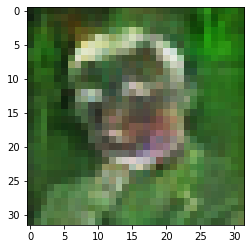

In [6]:
import matplotlib.pyplot as plt

plt.imshow(tf.squeeze(predict_target(target_model, 'portraits/alan_turing.png')))